<a href="https://colab.research.google.com/github/ericksanchezcorrea/Data_Science/blob/main/Proyecto-Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [392]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [393]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [394]:
data = pd.read_csv('/content/titanic.csv')

In [395]:
data.sample(2)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
55,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0,B96 B98,S,4,NaN,"Bryn Mawr, PA"
393,2,0,"Denbury, Mr. Herbert",male,25.0,0,0,C.A. 31029,31.5,NaN,S,NaN,NaN,"Guernsey / Elizabeth, NJ"


In [396]:
data.shape

(1309, 14)

##Descripción de las variables
pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

survival - Survival (0 = No; 1 = Yes)

name - Name

sex - Sex

age - Age

sibsp - Number of Siblings/Spouses Aboard

parch - Number of Parents/Children Aboard

ticket - Ticket Number

fare - Passenger Fare

cabin - Cabin

embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

boat - Lifeboat

body - Body Identification Number

home.dest - Home/Destination

In [373]:
columnas_categoricas = data.select_dtypes(include=['object']).columns
columnas_categoricas

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'boat', 'home.dest'], dtype='object')

In [374]:
columnas_numericas = data.select_dtypes(include=['int64','float64']).columns
columnas_numericas

Index(['pclass', 'survived', 'age', 'sibsp', 'parch', 'fare', 'body'], dtype='object')

In [375]:
data['survived'].value_counts()

,count
survived,
0,809
1,500


In [376]:
data['sex'].value_counts()

,count
sex,
male,843
female,466


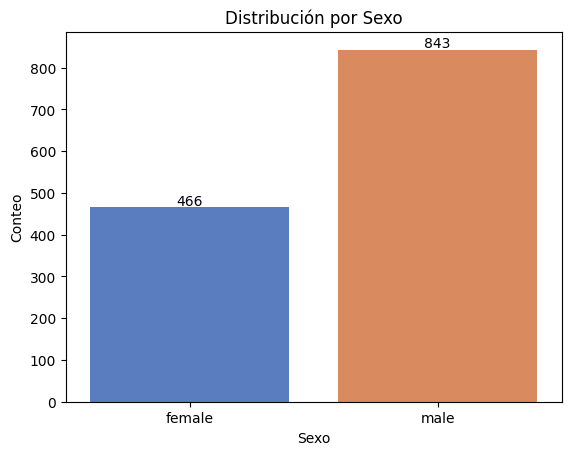

In [377]:
import math
sns.countplot(x='sex', data=data, hue='sex', palette='muted')
for p in plt.gca().patches:
    plt.annotate(
        f'{math.floor(p.get_height()) }',
        (p.get_x() + p.get_width() / 2., p.get_height()+15),
                ha='center', va='center')

plt.title('Distribución por Sexo')
plt.xlabel('Sexo')
plt.ylabel('Conteo')
plt.show()



In [397]:
data[data['survived']==1].groupby('sex')['survived'].size()

,survived
sex,
female,339
male,161


In [379]:
data[data['survived']==0].groupby('sex')['survived'].size()

,survived
sex,
female,127
male,682


In [398]:
data.groupby('sex')['survived'].mean()

,survived
sex,
female,0.727468
male,0.190985


In [399]:
data['pclass'].value_counts()

,count
pclass,
3,709
1,323
2,277


In [400]:
data.groupby(['pclass','sex'])['survived'].agg(['mean', 'sum','size']).sort_values(by='mean', ascending=False).rename(columns={'mean':'promedio','sum':'sobrev.','size': 'total'})

,,promedio,sobrev.,total
pclass,sex,,,
1,female,0.965278,139,144
2,female,0.886792,94,106
3,female,0.490741,106,216
1,male,0.340782,61,179
3,male,0.152130,75,493
2,male,0.146199,25,171


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


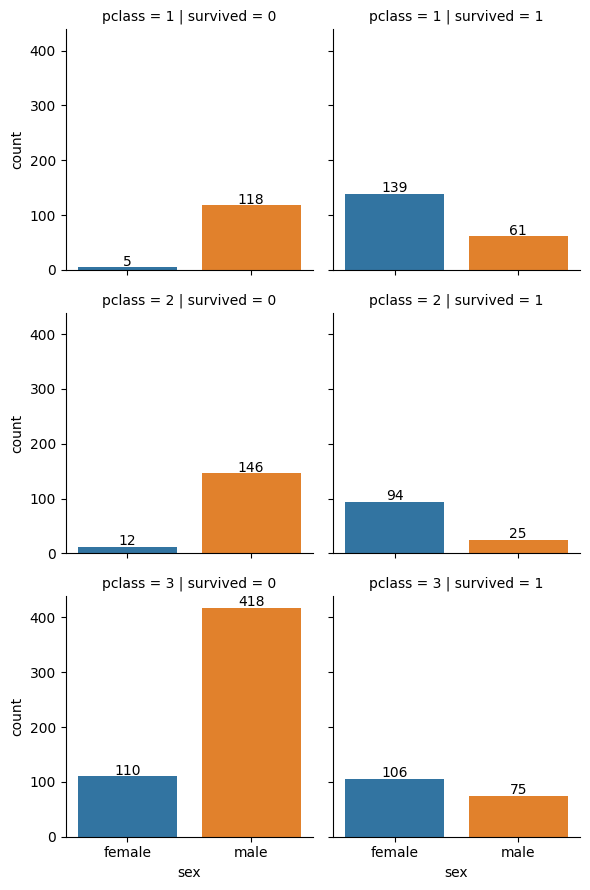

In [401]:
g= sns.FacetGrid(data=data, col='survived', row='pclass', hue='sex')
g.map(sns.countplot,'sex')

for ax in g.axes.flat:
    for p in ax.patches:
        ax.annotate(f'{math.floor(p.get_height()) }', (p.get_x() + p.get_width() / 2., p.get_height()+10),
                    ha='center', va='center')
plt.show()

In [384]:
data.groupby('sibsp')['survived'].mean().sort_values(ascending=False)

,survived
sibsp,
1,0.510972
2,0.452381
0,0.346801
3,0.300000
4,0.136364
5,0.000000
8,0.000000


In [385]:
data.groupby('parch')['survived'].mean().sort_values(ascending=False)

,survived
parch,
3,0.625000
1,0.588235
2,0.504425
0,0.335329
4,0.166667
5,0.166667
6,0.000000
9,0.000000


In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


Falta datos en 'age' y en 'fare que deben ser completados

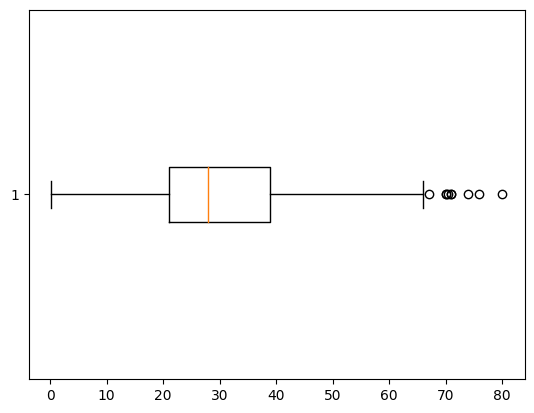

In [403]:
plt.boxplot(data['age'].dropna(), vert=False)
plt.show()

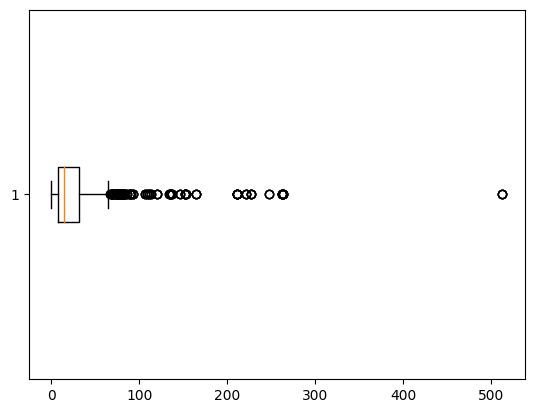

In [404]:
plt.boxplot(data['fare'].dropna(), vert=False)
plt.show()

In [405]:
data['age'].fillna(data['age'].mean(), inplace=True)
data['fare'].fillna(data['fare'].median(), inplace=True)

## Eliminamos las columnas que no aportan datos relevantes

In [406]:
data.drop(columns=['ticket','cabin','embarked','boat','body','home.dest','name'], inplace=True, axis=1)

In [408]:
data.head(1)

,pclass,survived,sex,age,sibsp,parch,fare
0,1,1,female,29.0,0,0,211.3375


In [409]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()
ohe = one_hot_encoder.fit_transform(data[['sex']])
ohe = ohe.astype(int)

In [410]:
one_hot_encoded_df = pd.DataFrame(ohe.toarray(), columns=one_hot_encoder.get_feature_names_out(['sex']))
one_hot_encoded_df

,sex_female,sex_male
0,1,0
1,0,1
2,1,0
3,0,1
4,1,0
...,...,...
1304,1,0
1305,1,0
1306,0,1
1307,0,1


In [411]:
data = pd.concat([data, one_hot_encoded_df], axis=1)

In [412]:
data.drop('sex', axis=1, inplace=True)

In [413]:
data.sample(1)

,pclass,survived,age,sibsp,parch,fare,sex_female,sex_male
749,3,0,28.0,1,1,14.4,1,0


In [414]:
X = data.drop(['survived'], axis=1).values
y = data['survived'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [415]:
# Dividir para el testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)

In [416]:
resultados = []

#Ajustar el modelo de regresión logística

In [417]:
from sklearn.linear_model import LogisticRegression

In [418]:
classifier  = LogisticRegression(random_state=0)

In [419]:
classifier .fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [420]:
y_pred = classifier .predict(X_test)

In [421]:
#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[127,  17],
       [ 43,  75]])

In [423]:
from sklearn.metrics import precision_score, recall_score, f1_score

metrics={
    'Modelo': classifier.__class__.__name__,
    'Precision': precision_score(y_test, y_pred),
    'Memoria': recall_score(y_test, y_pred),
    'F1_score': f1_score(y_test, y_pred),
    'Score': round(classifier.score(X_train, y_train) *100, 2)
}
resultados.append(metrics)
print(metrics)

{'Modelo': 'LogisticRegression', 'Precision': 0.8152173913043478, 'Memoria': 0.635593220338983, 'F1_score': 0.7142857142857143, 'Score': 79.27}


#Ajustar el modelo de Arboles de decisión

In [424]:
#Ajustar el modelo de Arboles de decisión
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [425]:
y_pred = classifier.predict(X_test)

In [426]:
confusion_matrix(y_test, y_pred)

array([[125,  19],
       [ 37,  81]])

In [427]:
metrics={
    'Modelo': classifier.__class__.__name__,
    'Precision': precision_score(y_test, y_pred),
    'Memoria': recall_score(y_test, y_pred),
    'F1_score': f1_score(y_test, y_pred),
    'Score': round(classifier.score(X_train, y_train) *100, 2)
}
resultados.append(metrics)
print(metrics)

{'Modelo': 'DecisionTreeClassifier', 'Precision': 0.81, 'Memoria': 0.6864406779661016, 'F1_score': 0.743119266055046, 'Score': 97.04}


#Ajustar el modelo de Bosques aleatorios

In [428]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [429]:
y_pred = classifier.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])

Reales [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]


In [430]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[125,  19],
       [ 40,  78]])

In [431]:
metrics={
    'Modelo': classifier.__class__.__name__,
    'Precision': precision_score(y_test, y_pred),
    'Memoria': recall_score(y_test, y_pred),
    'F1_score': f1_score(y_test, y_pred),
    'Score': round(classifier.score(X_train, y_train) *100, 2)
}
resultados.append(metrics)
print(metrics)

{'Modelo': 'RandomForestClassifier', 'Precision': 0.8041237113402062, 'Memoria': 0.6610169491525424, 'F1_score': 0.7255813953488373, 'Score': 97.04}


#Ajustar el modelo de KNN
     

In [432]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [433]:
y_pred = classifier.predict(X_test)
print('Reales', y_test[:10], 'Predicción: ', y_pred[:10])

Reales [0 1 0 0 0 1 0 1 0 1] Predicción:  [0 0 0 0 0 0 0 0 0 1]


In [434]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[119,  25],
       [ 60,  58]])

In [435]:
metrics={
    'Modelo': classifier.__class__.__name__,
    'Precision': precision_score(y_test, y_pred),
    'Memoria': recall_score(y_test, y_pred),
    'F1_score': f1_score(y_test, y_pred),
    'Score': round(classifier.score(X_train, y_train) *100, 2)
}
resultados.append(metrics)
print(metrics)

{'Modelo': 'KNeighborsClassifier', 'Precision': 0.6987951807228916, 'Memoria': 0.4915254237288136, 'F1_score': 0.5771144278606966, 'Score': 78.8}


In [442]:
df_resultados = pd.DataFrame(resultados)
df_resultados.drop_duplicates(inplace=True)
df_resultados.style.hide(axis='index')

Modelo,Precision,Memoria,F1_score,Score
LogisticRegression,0.815217,0.635593,0.714286,79.270000
DecisionTreeClassifier,0.810000,0.686441,0.743119,97.040000
RandomForestClassifier,0.804124,0.661017,0.725581,97.040000
KNeighborsClassifier,0.698795,0.491525,0.577114,78.800000


In [462]:
mejor = df_resultados[df_resultados['Precision'] == df_resultados['Precision'].max()]
mejor.values[0][0]

'LogisticRegression'

In [468]:
print('El modelo con mejor precisión: ', df_resultados[df_resultados['Precision'] == df_resultados['Precision'].max()].values[0][0])
print('El modelo con mejor rendimiento de memoria: ', df_resultados[df_resultados['Memoria'] == df_resultados['Memoria'].max()].values[0][0])
print('El modelo con mejor rendimiento de F1_score: ', df_resultados[df_resultados['F1_score'] == df_resultados['F1_score'].max()].values[0][0])
print('El modelo con mejor rendimiento de Score: ', df_resultados[df_resultados['Score'] == df_resultados['Score'].max()].values[0][0])

El modelo con mejor precisión:  LogisticRegression
El modelo con mejor rendimiento de memoria:  DecisionTreeClassifier
El modelo con mejor rendimiento de F1_score:  DecisionTreeClassifier
El modelo con mejor rendimiento de Score:  DecisionTreeClassifier
